<a href="https://colab.research.google.com/github/jungsh210/pbm15/blob/main/notebook/chap08_DNN_keras_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DNN with keras

## mse vs. bce
- mean squared error
- binary cross-entropy

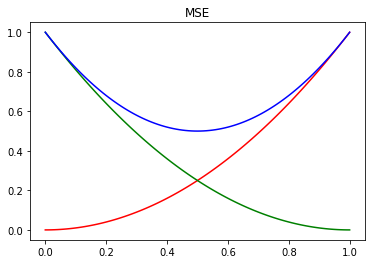

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log


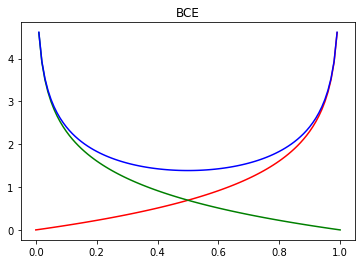

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# MSE
# mse(y,y_hat) = (y - y_hat)**2
#
x = np.linspace(0.0, 1.0, 101) 
y0 = np.square(x)
y1 = np.square(1-x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('MSE')
plt.show() 

# BCE
# bce(y,y_hat) = - y log(y_hat) - (1-y) log(1-y_hat)
#
x = np.linspace(0.0, 1.0, 101) 
y0 = -np.log(1-x)
y1 = -np.log(x)
plt.plot(x, y0, 'r') 
plt.plot(x, y1, 'g') 
plt.plot(x, y0+y1, 'b') 
plt.title('BCE')
plt.show() 

## cross-entropy
- BinaryCrossentropy
- CategoricalCrossentropy
- SparseCategoricalCrossentropy

In [ ]:
# import numpy as np
import tensorflow as tf

y_true = [  [1],   [0],   [0],   [1]]  
y_pred = [[0.9], [0.1], [0.2], [0.9]]   
bce = tf.keras.losses.BinaryCrossentropy()
print(bce(y_true, y_pred).numpy())
      
# CatergoricalCrossentropy, 3 classes
y_true = [[0.0, 1.0, 0.0], [0.0, 0.0, 1.0], [1.0, 0.0, 0.0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
cce = tf.keras.losses.CategoricalCrossentropy ()
print(cce(y_true, y_pred).numpy ())      

# SparseCategoricalCrossentropy, 3 classes
y_true = [[1], [2], [0]] # 고양이, 호랑이, 강아지
y_pred = [[0.1, 0.8, 0.1], [0.2, 0.1, 0.7], [0.8, 0.1, 0.1]]
scce = tf.keras.losses.SparseCategoricalCrossentropy ()
print(scce(y_true, y_pred).numpy ())      

y_true = [ 12 , 20 , 29 , 60 ]
y_pred = [ 14 , 18 , 27 , 55 ]
mse = tf.keras.losses.MeanSquaredError ()
print(mse(y_true, y_pred).numpy())

#########################################
def  custom_loss_function (y_true, y_pred) :
   squared_difference = tf.square (y_true-y_pred)
   return tf.reduce_mean (squared_difference, axis = -1 )


0.13480616
0.26765403
0.26765403
9


## int encoding

In [ ]:
import numpy as np
X = np.array([['Korea', 44, 7200], 
		['Japan', 27, 4800], 
		['China', 30, 6100]])

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# 원하는 열을 뽑아서 2차원 배열로 만들어서 전달하여야 한다. 
XX = labelencoder.fit_transform(X[:,0].reshape(-1,1))
print(XX)

X = np.delete(X, [0], axis=1)		# 0Ã«Â²ÂˆÃ¬Â§Â¸ Ã¬Â—Â´ Ã¬Â‚Â­Ã¬Â Âœ
X = np.concatenate((XX.reshape(-1,1), X), axis = 1)	# XÃ¬Â™Â€ XXÃ«Â¥Â¼ Ã«Â¶Â™Ã¬ÂÂ¸Ã«Â‹Â¤. 
print(X)

[2 1 0]
[['2' '44' '7200']
 ['1' '27' '4800']
 ['0' '30' '6100']]


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## one-hot encoding

In [ ]:
class_vector =[2, 6, 6, 1]
  
from tensorflow.keras.utils import to_categorical
output = to_categorical(class_vector, num_classes = 7, dtype ="int32")
print(output)

#
# mnist data
#
import tensorflow as tf
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape)

y_train[:10]

y_train_one_hot = to_categorical(y_train, num_classes = 10) #, dtype ="int32")
y_train_one_hot.shape
y_train_one_hot[:10]


[[0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0]]
11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## Scaler
- MinMaxScaler
- SrandardScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]

scaler = MinMaxScaler()
scaler.fit(data)		# 최대값과 최소값을 알아낸다. 
print(scaler.transform(data))	# 데이터를 변환한다. 

# StandardScaler()
from sklearn.preprocessing import StandardScaler
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
# data = [[-1, 2, 7], [-0.5, 6, 3], [0, 10, -2], [1, 18, 6]]

scaler = StandardScaler()
scaler.fit(data)		# 평균=0, 분산=std 로 데이터 변경
print(scaler.transform(data))	# 데이터를 변환한다. 


[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[-1.18321596 -1.18321596]
 [-0.50709255 -0.50709255]
 [ 0.16903085  0.16903085]
 [ 1.52127766  1.52127766]]


## Normalization layer

In [ ]:
import numpy as np
from  tensorflow.keras.layers.experimental.preprocessing import Normalization

input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
print(layer(input_data))

#
adapt_data = np.array([[1.], [2.], [3.], [4.], [5.]], dtype=np.float32)
input_data = np.array([[1.], [2.], [3.]], np.float32)
layer = Normalization()
layer.adapt(adapt_data)
print(layer(input_data))

tf.Tensor(
[[1.]
 [2.]
 [3.]], shape=(3, 1), dtype=float32)
tf.Tensor(
[[-1.4142135 ]
 [-0.70710677]
 [ 0.        ]], shape=(3, 1), dtype=float32)


## IMDB 영화평 학습

17464789/17464789 [==============================] - 0s 0us/step
Epoch 1/20
49/49 [==============================] - 1s 12ms/step - loss: 0.6053 - accuracy: 0.6947 - val_loss: 0.4654 - val_accuracy: 0.8076
Epoch 2/20
49/49 [==============================] - 0s 8ms/step - loss: 0.3866 - accuracy: 0.8382 - val_loss: 0.3526 - val_accuracy: 0.8510
Epoch 3/20
49/49 [==============================] - 0s 9ms/step - loss: 0.3262 - accuracy: 0.8652 - val_loss: 0.3323 - val_accuracy: 0.8594
Epoch 4/20
49/49 [==============================] - 0s 7ms/step - loss: 0.3089 - accuracy: 0.8725 - val_loss: 0.3286 - val_accuracy: 0.8600
Epoch 5/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2996 - accuracy: 0.8758 - val_loss: 0.3280 - val_accuracy: 0.8604
Epoch 6/20
49/49 [==============================] - 0s 7ms/step - loss: 0.2921 - accuracy: 0.8796 - val_loss: 0.3311 - val_accuracy: 0.8578
Epoch 7/20
49/49 [==============================] - 0s 8ms/step - loss: 0.2873 - accuracy: 0.8

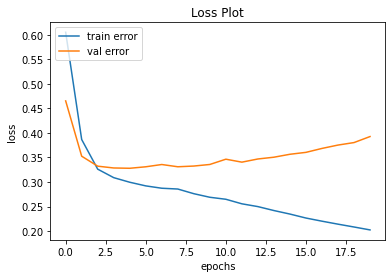

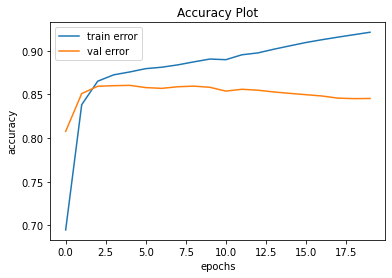

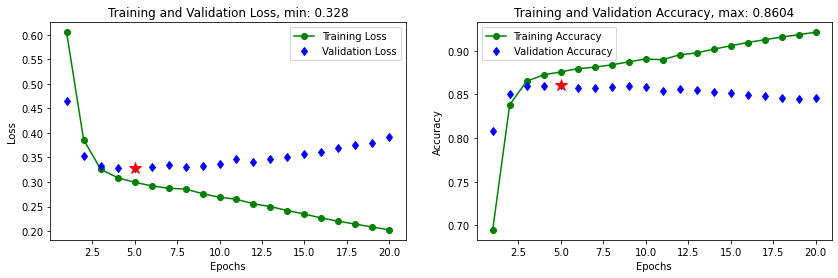

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data(num_words=1000)
len(train_data[0]),np.unique(train_data[0]).size
max(train_data.max())
train_data.shape,train_labels.shape

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = np.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# train_data.shape,test_data.shape
# train_data[0]

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=1)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
history_dict = history.history
loss_values = history_dict['loss']		# 훈련 데이터 손실값
val_loss_values = history_dict['val_loss']	# 검증 데이터 손실값
acc = history_dict['accuracy']			# 정확도
epochs = range(1, len(acc) + 1)		# 에포크 수

plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('Loss Plot')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy Plot')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train error', 'val error'], loc='upper left')
plt.show()

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## IMDB 영화평 
- L2 규제
- Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6358 - accuracy: 0.6958 - val_loss: 0.4935 - val_accuracy: 0.8164 - 1s/epoch - 22ms/step
Epoch 2/20
49/49 - 0s - loss: 0.4204 - accuracy: 0.8464 - val_loss: 0.3890 - val_accuracy: 0.8553 - 394ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.3659 - accuracy: 0.8666 - val_loss: 0.3729 - val_accuracy: 0.8601 - 339ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.3509 - accuracy: 0.8717 - val_loss: 0.3708 - val_accuracy: 0.8591 - 341ms/epoch - 7ms/step
Epoch 5/20
49/49 - 1s - loss: 0.3427 - accuracy: 0.8755 - val_loss: 0.3649 - val_accuracy: 0.8594 - 653ms/epoch - 13ms/step
Epoch 6/20
49/49 - 1s - loss: 0.3372 - accuracy: 0.8752 - val_loss: 0.3645 - val_accuracy: 0.8596 - 689ms/epoch - 14ms/step
Epoch 7/20
49/49 - 1s - loss: 0.3346 - accuracy: 0.8759 - val_loss: 0.3615 - val_accuracy: 0.8609 - 673ms/epoch - 14ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3288 - accuracy: 0.8777 - val_loss: 0.3599 - val_accuracy: 0.8611 - 460ms/epoch - 9ms/step
Epoch 9/20
49/4

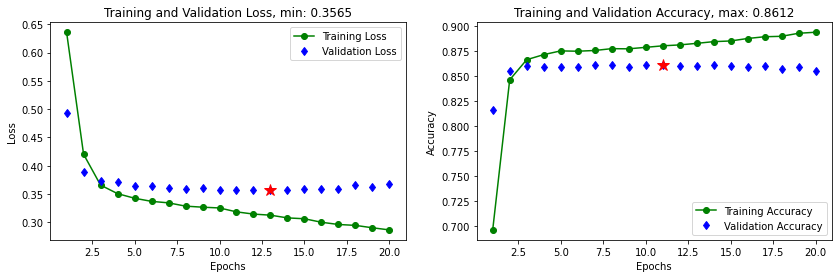

In [ ]:
# L2 규제
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  
	activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dense(16,		 
	kernel_regularizer=tf.keras.regularizers.l2(0.001),  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### Dropout

Epoch 1/20
49/49 - 1s - loss: 0.6785 - accuracy: 0.5637 - val_loss: 0.6309 - val_accuracy: 0.7490 - 1s/epoch - 23ms/step
Epoch 2/20
49/49 - 0s - loss: 0.6051 - accuracy: 0.6829 - val_loss: 0.5251 - val_accuracy: 0.8153 - 389ms/epoch - 8ms/step
Epoch 3/20
49/49 - 0s - loss: 0.5296 - accuracy: 0.7492 - val_loss: 0.4343 - val_accuracy: 0.8381 - 349ms/epoch - 7ms/step
Epoch 4/20
49/49 - 0s - loss: 0.4679 - accuracy: 0.7993 - val_loss: 0.3854 - val_accuracy: 0.8478 - 427ms/epoch - 9ms/step
Epoch 5/20
49/49 - 1s - loss: 0.4254 - accuracy: 0.8229 - val_loss: 0.3506 - val_accuracy: 0.8538 - 536ms/epoch - 11ms/step
Epoch 6/20
49/49 - 0s - loss: 0.3999 - accuracy: 0.8376 - val_loss: 0.3359 - val_accuracy: 0.8581 - 447ms/epoch - 9ms/step
Epoch 7/20
49/49 - 0s - loss: 0.3841 - accuracy: 0.8448 - val_loss: 0.3310 - val_accuracy: 0.8556 - 410ms/epoch - 8ms/step
Epoch 8/20
49/49 - 0s - loss: 0.3669 - accuracy: 0.8498 - val_loss: 0.3260 - val_accuracy: 0.8597 - 374ms/epoch - 8ms/step
Epoch 9/20
49/49 

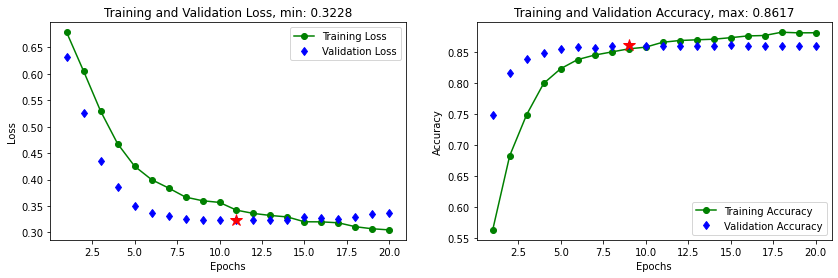

In [ ]:
import numpy as numpy
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 다운로드
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.imdb.load_data( num_words=1000)

# 원-핫 인코딩으로 변환하는 함수
def one_hot_sequences(sequences, dimension=1000):
    results = numpy.zeros((len(sequences), dimension))
    for i, word_index in enumerate(sequences):
        results[i, word_index] = 1.
    return results

train_data = one_hot_sequences(train_data)
test_data = one_hot_sequences(test_data)

# 신경망 모델 구축
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(1000,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam',
                  metrics=['accuracy'])

# 신경망 훈련, 검증 데이터 전달
history = model.fit(train_data,
                    train_labels,
                    epochs=20,
                    batch_size=512,
                    validation_data=(test_data, test_labels),
                    verbose=2)
# 훈련 데이터의 손실값과 검증 데이터의 손실값을 그래프에 출력
#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## MNIST : DNN

(60000, 28, 28) (60000,)
Epoch 1/20
1875/1875 [==============================] - 17s 9ms/step - loss: 0.2200 - accuracy: 0.9338 - val_loss: 0.1045 - val_accuracy: 0.9674
Epoch 2/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0967 - accuracy: 0.9704 - val_loss: 0.0766 - val_accuracy: 0.9756
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0700 - accuracy: 0.9778 - val_loss: 0.0778 - val_accuracy: 0.9765
Epoch 4/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0530 - accuracy: 0.9826 - val_loss: 0.0702 - val_accuracy: 0.9791
Epoch 5/20
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0432 - accuracy: 0.9857 - val_loss: 0.0748 - val_accuracy: 0.9783
Epoch 6/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0370 - accuracy: 0.9880 - val_loss: 0.0763 - val_accuracy: 0.9783
Epoch 7/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0307 - accuracy: 0.9896 - 

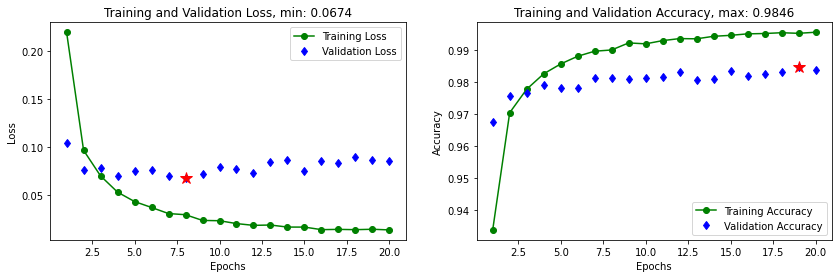

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape,y_train.shape)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, 
          epochs=20,
          validation_data=(x_test, y_test),
          verbose=1)

model.evaluate(x_test, y_test)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()



#fashion_A.py

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28) (60000,)
[9 0 0 3 0 2 7 2 5 5]
Epoch 1/25
1875/1875 [==============================] - 11s 6ms/step - loss: 0.4983 - accuracy: 0.8239 - val_loss: 0.4308 - val_accuracy: 0.8497
Epoch 2/25
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3716 - accuracy: 0.8670 - val_loss: 0.4090 - val_accuracy: 0.8539
Epoch 3/25
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3375 - accuracy: 0.8770 - val_loss: 0.3751 - val_accuracy: 0.8670
Epoch 4/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3128 - accuracy: 0.8851 - val_loss: 0.3483 - val_accuracy: 0.8742
Epoch 5/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2944 - accuracy: 0.8917 - val_loss: 0.3731 - val_accuracy: 0.8695
Epoch 6/25
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2798 - accuracy: 0.8967 - val_loss: 0.3473 - val_accuracy: 0.8786
Epoch 7/25
1875/1875 [==

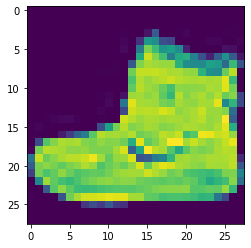

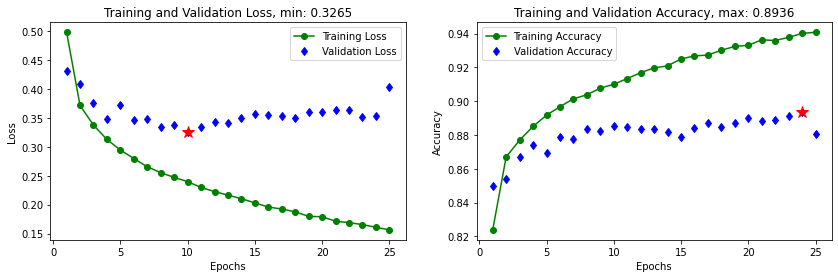

In [1]:
# import tensorflow as tf
# from tensorflow import keras
# import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models

fashion_mnist = datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape,train_labels.shape)
print(train_labels[:10])

plt.imshow(train_images[0])

train_images = train_images / 255.0
test_images = test_images / 255.0

# model
model = models.Sequential()
model.add(layers.Flatten(input_shape=(28, 28))) #(784,)   ---> 28*28=784
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',   
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, 
          epochs=25,
          validation_data=(test_images, test_labels),
          verbose=1)

test_loss, test_acc = model.evaluate(test_images, test_labels)
print('정확도:', test_acc)

#############################################
# More training graphs
# More graphs of loss and accuracy
# import matplotlib.pyplot as plt
import numpy as np

history_dict = history.history 
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(14, 4))

plt.subplot(1,2,1)
plt.plot(epochs, loss, 'go-', label='Training Loss')
plt.plot(epochs, val_loss, 'bd', label='Validation Loss')
plt.plot(np.argmin(np.array(val_loss))+1,val_loss[np.argmin(np.array(val_loss))], 'r*', ms=12)
plt.title('Training and Validation Loss, min: ' + str(np.round(val_loss[np.argmin(np.array(val_loss))],4)))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.subplot(1,2,2)
plt.plot(epochs, acc, 'go-', label='Training Accuracy') #, c='blue')
plt.plot(epochs, val_acc, 'bd', label='Validation Accuracy') #, c='red')
plt.plot(np.argmax(np.array(val_acc))+1,val_acc[np.argmax(np.array(val_acc))], 'r*', ms=12)
plt.title('Training and Validation Accuracy, max: ' + str(np.round(val_acc[np.argmax(np.array(val_acc))],4)))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#titanic_test.py

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

# 데이터 세트를 읽어들인다. 
train = pd.read_csv("train.csv", sep=',')
test = pd.read_csv("test.csv", sep=',')
print(train.shape)
# 필요없는 컬럼을 삭제한다. 
train.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)
print(train.shape)
train.head()
train.isna().sum()
train.duplicated().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
train.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in train.index:
    if train.loc[ix, 'Sex']=="male":
       train.loc[ix, 'Sex']=1 
    else:
       train.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
target = np.ravel(train.Survived) 

# 생존여부를 학습 데이터에서 삭제한다. 
train.drop(['Survived'], inplace=True, axis=1)
train = train.astype(float)     # 최근 소스에서는 float형태로 형변환하여야 

# 케라스 모델을 생성한다. 
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(16, activation='relu', input_shape=(2,)))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 케라스 모델을 컴파일한다. 
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# 케라스 모델을 학습시킨다. 
model.fit(train, target, epochs=30, batch_size=1, verbose=1)

######################################
# 훈련시킨 모델을 테스트 데이터에 적용 : 생사 예측
######################################
# test model
# 필요없는 컬럼을 삭제한다. 
test.drop(['SibSp', 'Parch', 'Ticket', 'Embarked', 'Name',\
        'Cabin', 'PassengerId', 'Fare', 'Age'], inplace=True, axis=1)

test.isna().sum()
# 결손치가 있는 데이터 행은 삭제한다. 
test.dropna(inplace=True)

# 기호를 수치로 변환한다. 
for ix in test.index:
    if test.loc[ix, 'Sex']=="male":
       test.loc[ix, 'Sex']=1 
    else:
       test.loc[ix, 'Sex']=0 

# 2차원 배열을 1차원 배열로 평탄화한다. 
# target_test = np.ravel(test.Survived) 
# 생존여부를 학습 데이터에서 삭제한다. 
# test.drop(['Survived'], inplace=True, axis=1)
test = test.astype(float)     
test.shape   # (418,2)
# 학습된 model을 이용해서 tset 데이터에 대한 생존 예측
pred_test = model.predict(test, batch_size=1)
# Survival
np.where(pred_test >= 0.5)[0].size  # 152
# Dead
np.where(pred_test < 0.5)[0].size   # 266




(891, 12)
(891, 3)
Epoch 1/30
891/891 [==============================] - 2s 1ms/step - loss: 0.5870 - accuracy: 0.7093
Epoch 2/30
891/891 [==============================] - 1s 2ms/step - loss: 0.5151 - accuracy: 0.7856
Epoch 3/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4899 - accuracy: 0.7856
Epoch 4/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4801 - accuracy: 0.7868
Epoch 5/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4727 - accuracy: 0.7856
Epoch 6/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4683 - accuracy: 0.7890
Epoch 7/30
891/891 [==============================] - 1s 2ms/step - loss: 0.4660 - accuracy: 0.7856
Epoch 8/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4644 - accuracy: 0.7767
Epoch 9/30
891/891 [==============================] - 2s 2ms/step - loss: 0.4622 - accuracy: 0.7789
Epoch 10/30
891/891 [==============================] - 1s 1ms/step - loss: 0.4612

266